CaleyNovitskaia

In [1]:
import numpy as np
from scipy.special import factorial
In = np.loadtxt('Input2.txt')
np.random.seed(seed=int(In))

def model(t,
          lamb=1,
          delta=1):
    return lamb / delta * (1 - np.exp(- delta * t))

def prior(mu=1,
          sigma2=1,
          theta=1,
          ):
    return np.exp(- (theta - mu) ** 2/(2 * sigma2)) / ((2 * np.pi * sigma2) ** 0.5)

def likelihood(x_i, y):
    n = len(y)
    L_i = np.zeros(n)
    for i in range(n):
        L_i[i] = ((x_i ** y[i]) * np.exp(- x_i))/factorial(y[i])
    return L_i.prod()

def compute_post(y, t, par):
    lamb, delta = par
    
    prior_lamb = prior(mu=15,
                   sigma2=5, 
                   theta=lamb)

    prior_delta = prior(mu=1,
                       sigma2=10, 
                       theta=delta)
    
    x_i = model(t, lamb=lamb, delta=delta)
    
    L = likelihood(x_i, y)

    return (prior_lamb * prior_delta * L)


def save(par, name):
    np.savetxt(name, par, delimiter=',', fmt='%1.2f')

In [2]:
def Gibbs_sampling(init, 
         n=10, 
         compute_post=None,
         **kwargs):
    
    def criteria(p_cur, 
                 p_next):
        
        return min(1, p_next/p_cur)

    def sample_par(x, sigma=3):
        return np.random.normal(x, sigma)
    
    
    par_cur = init
    post_cur = compute_post(par=par_cur, **kwargs)
    pars = [par_cur.copy()]

    for i in range(n):        
        for j in range(2):
            if j == 0:
                lambda_next = sample_par(par_cur[0])
                par_next = [lambda_next, par_cur[1]]
                x = lambda_next
            else:
                delta_next = sample_par(par_cur[1])
                par_next = [par_cur[0], delta_next]
                x = delta_next
            if x <= 0:
                post_next = 0
            else:
                post_next = compute_post(par=par_next, **kwargs)
                
            r = np.random.uniform(0, 1)
        
            if r < criteria(post_cur, post_next):
                par_cur = par_next.copy()
                post_cur = post_next
            pars.append(par_cur.copy())        

    return pars

In [3]:
y = [10, 10, 11, 8, 9, 7, 8, 9, 9, 10]
t = 100

init = [45, 4]

In [4]:
pars = Gibbs_sampling(init,
             n=5,
             compute_post=compute_post, 
             y=y,
             t=t)

In [5]:
save(pars, 'Exc10Task1.txt')

## b)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

def plot_hists(pars):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(pars[:, 0], density=True)
    axes[0].set_title(r'$\lambda$')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Density')
    axes[0].set_xlim((5, 30))
    
    axes[1].hist(pars[:, 1], density=True)
    axes[1].set_title(r'$\delta$')
    axes[1].set_xlabel('Value')
    axes[1].set_ylabel('Density')
    axes[1].set_xlim((0.5, 3))
    
    
    plt.show()

In [7]:
def plot_joint(pars):
    lamb_ = np.linspace(5, 30, 100)
    delta_ = np.linspace(0.5, 3, 100)
    
    lamb_mesh, delta_mesh = np.meshgrid(lamb_, delta_)
    positions = np.vstack([lamb_mesh.ravel(), delta_mesh.ravel()])
    
    kernel = stats.gaussian_kde(pars.T)
    
    f = np.reshape(kernel(positions).T, lamb_mesh.shape)
    plt.pcolormesh(lamb_mesh, delta_mesh, f)

    plt.contour(lamb_mesh, delta_mesh, f)
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$\delta$')
    plt.title('kernel density plot')
    
    plt.show()

In [8]:
In = np.loadtxt('Input2.txt')
np.random.seed(seed=int(In))

y = [10, 10, 11, 8, 9, 7, 8, 9, 9, 10]
init = [45, 4]
t = 100

pars = Gibbs_sampling(init, 
         compute_post=compute_post, 
         y=y,
         t=t,
         n=200000)

pars = np.array(pars)
pars_kept = pars[int(pars.shape[0] * 0.9):, :]

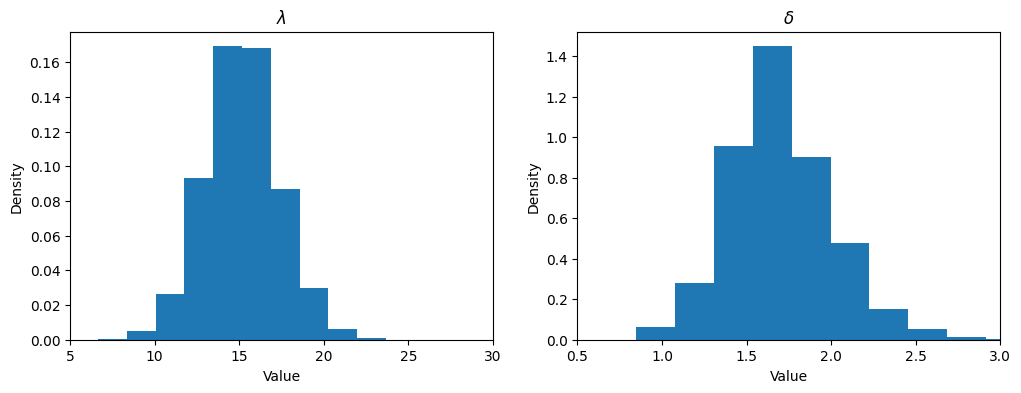

In [9]:
plot_hists(pars_kept)

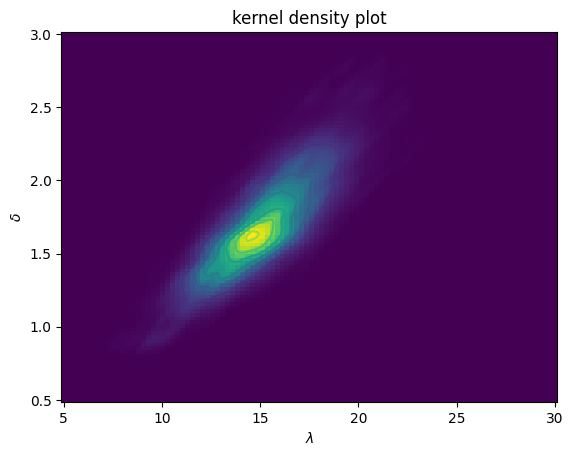

In [10]:
plot_joint(pars_kept)

From our perspective the distributions obtained in the current HW resembles distributions from the previous HW.

## c)

In [11]:
In = np.loadtxt('Input2.txt')
np.random.seed(seed=int(In))

y = [10, 10, 11, 8, 9, 7, 8, 9, 9, 10]
init = [45, 4]
t = 100

In [12]:
def Gibbs_sampling_marginal(init, 
         n=10, 
         compute_post=None,
         **kwargs):
    
    def criteria(p_cur, 
                 p_next):
        
        return min(1, p_next/p_cur)

    def sample_par(x, sigma=3):
        return np.random.normal(x, sigma)
    
    
    par_cur = init
    post_cur = compute_post(par=par_cur, **kwargs)
    pars = [par_cur[0]]

    for i in range(n):        
        for j in range(2):
            if j == 0:
                lambda_next = sample_par(par_cur[0])
                par_next = [lambda_next, par_cur[1]]
                x = lambda_next
            else:
                delta_next = sample_par(par_cur[1])
                par_next = [par_cur[0], delta_next]
                x = delta_next
            if x <= 0:
                post_next = 0
            else:
                post_next = compute_post(par=par_next, **kwargs)
                
            r = np.random.uniform(0, 1)
        
            if r < criteria(post_cur, post_next):
                par_cur = par_next.copy()
                post_cur = post_next
        pars.append(par_cur[0])        

    return pars

In [13]:
In = np.loadtxt('Input2.txt')
np.random.seed(seed=int(In))

y = [10, 10, 11, 8, 9, 7, 8, 9, 9, 10]
init = [45, 4]
t = 100

thetas2 = Gibbs_sampling_marginal(init, 
         compute_post=compute_post, 
         y=y,
         t=t,
         n=200000)

thetas2 = np.array(thetas2)
thetas2 = pars[int(thetas2.shape[0] * 0.9):]

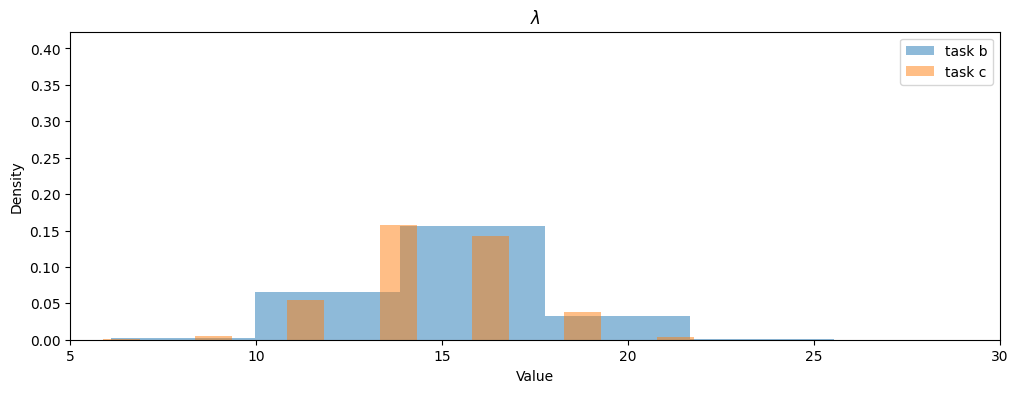

In [14]:
plt.subplots(1, 1, figsize=(12, 4))
plt.hist(pars[:, 0], density=True, alpha=0.5, label='task b')
plt.hist(thetas2, density=True, alpha=0.5, label='task c')
plt.title(r'$\lambda$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim((5, 30))
plt.legend()
plt.show()

Here we are considering the case, when we want to compute $\pi(\theta_2 | y)$ as the marginal instead of $\pi(\theta_1 | y)$

According to the lecture slides:

We can consider the Gibbs sampling as the Markov chain process with the transitions across the parameter space:

$(\theta_1^s \theta_2^s) \rightarrow ( \theta_1^{s+1}  \theta_2^{s}) \rightarrow (\theta_1^{s+1} \theta_2^{s+1})$

$P(\theta_2^{s+1} | \theta_2^{s} ) =  \int P(\theta_2^{s+1}| \theta_1^{s+1})  P(\theta_1^{s+1} | \theta_2^s) $

Considering transition for the simplified case (discrete case):
$T_{\theta_2 | \theta_2} = T_{\theta_1 | \theta_2} \cdot T_{\theta_2 | \theta_1}$ we can say that $\pi_{\theta_2} = \pi_{\theta_2} T_{\theta_2 | \theta_2}$ where $\pi$ is a marginal distribution in the $\inf$ Gibbs sequence.

In order to move from $\theta_2^{s} $ to $\theta_2^{s + 1} $ we need to go throught the state $\theta_1^{s+1}$ which is intermediate, and conditioned on $\theta_2^{s} $.

But also, we can consider the move from $\theta_2^{s} $ to $\theta_2^{s + 1} $ directly with the transition matrix $T_{\theta_2 | \theta_2}$, and use $\theta_1^{s+1}$ only to compute the intermediate state. After burn-in these transitions from $\theta_2^{s} $ to $\theta_2^{s + 1} $ would follow the marginal distribution.

Therefore, there is no need to store the values of the parameter $\theta_1$ in case we want to get marginal of $\theta_2$. And instead of saving a pair of parameters after every update we can just save $\theta_2^{s}, \theta_2^{s + 1}, ...  \theta_2^{s + k}$. It would give a marginal of $\theta_2^{s}$ and allow not to compute the marginalized distribution of the second parameter $\pi(\theta_1 | y)$ as well as joint distributions.